In [2]:
import numpy as np
# --- Config ---
shots = 100

# qubit register blocks (name, count)
qrblock = [('q',2),('r',3)]

# clas register blocks (name, count)
crblock = [('c',2),('c2',3)]

In [3]:
from qiskit import *

# The quantum circuit takes in the quantum register and classical register
qregs =  [QuantumRegister(x,n) for n,x in qrblock]
cregs =  [ClassicalRegister(x,n) for n,x in crblock]
#qc = QuantumCircuit(QuantumRegister (len(istates) , 'q'))
qc = QuantumCircuit(*qregs,*cregs)
for i,s in istates:
    if s != None:
        qc.initialize(s,i)

C:\Users\Lowkey PC\AppData\Local\Temp\ipykernel_2284\1456413617.py:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0,1)
c:\Users\Lowkey PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


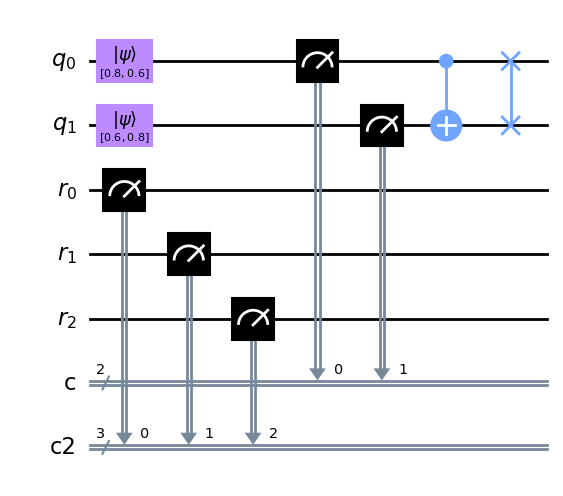

In [4]:
# Insert circuit here
# use numbers to reference qubits
# qc.measure(0, reg) || (0,x) where x is a number
qc.measure([0,1],[0,1])
qc.measure([2,3,4],[2,3,4])
qc.cnot(0,1)
qc.swap(1,0)


# Draw it
qc.draw(output="mpl")

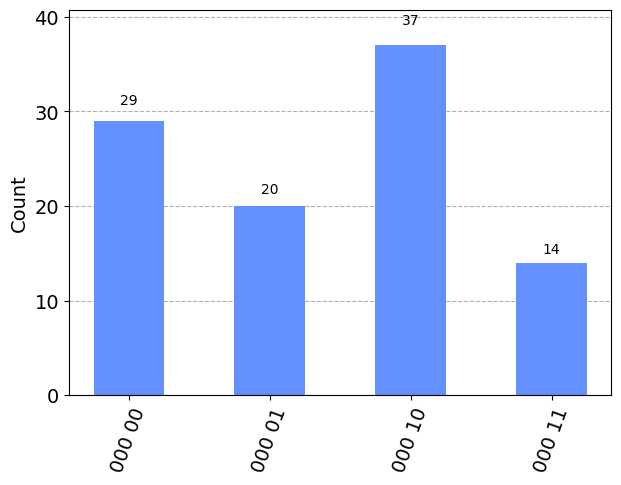

In [5]:
from qiskit_aer import AerSimulator

backend = AerSimulator()
job = backend.run(qc, shots=shots, memory=True)

from qiskit.tools.visualization import plot_histogram

result = job.result()
counts = result.get_counts()

plot_histogram(counts)